Training entries: 54397
Benchmark entries: 13601


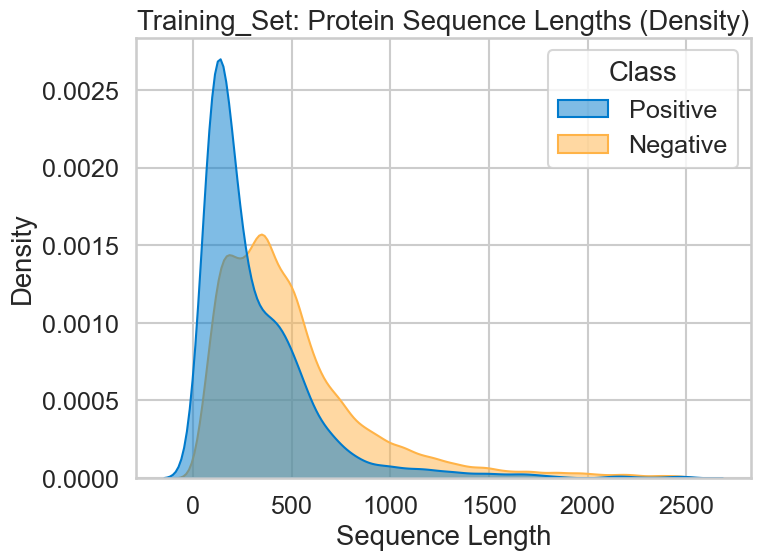

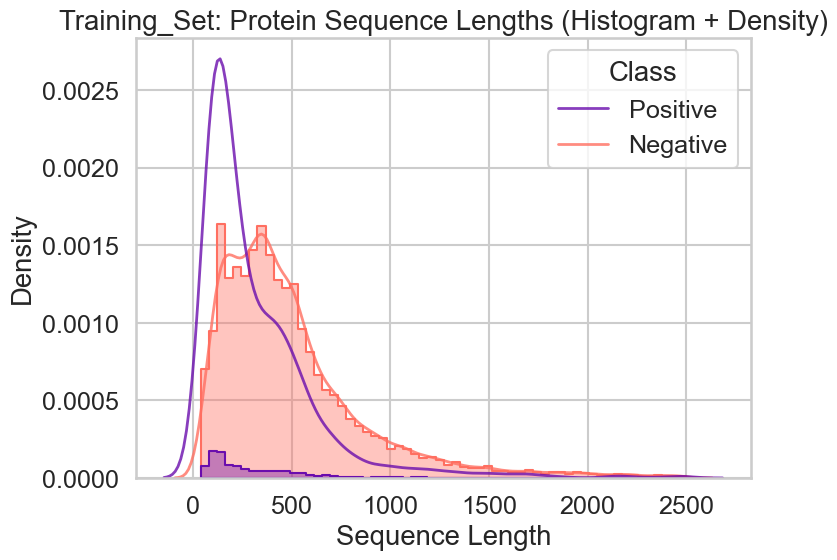

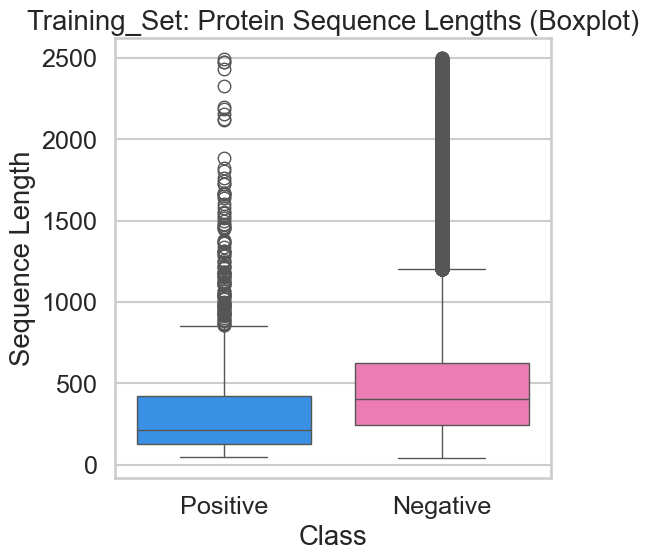

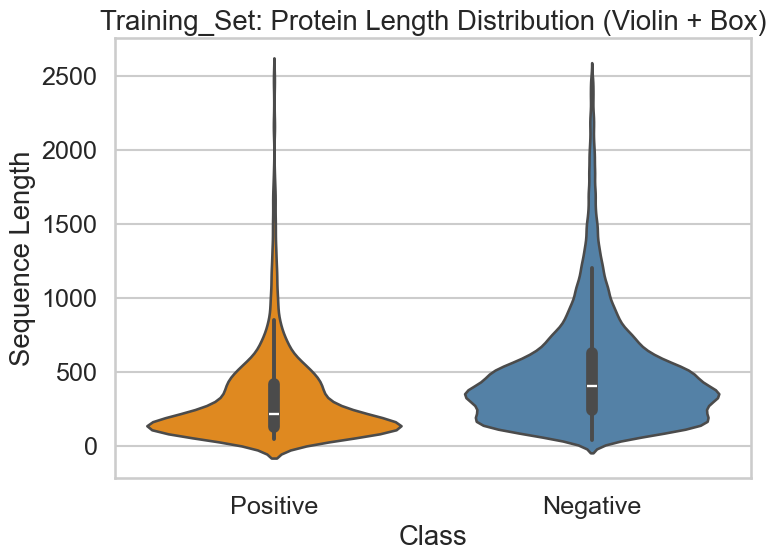

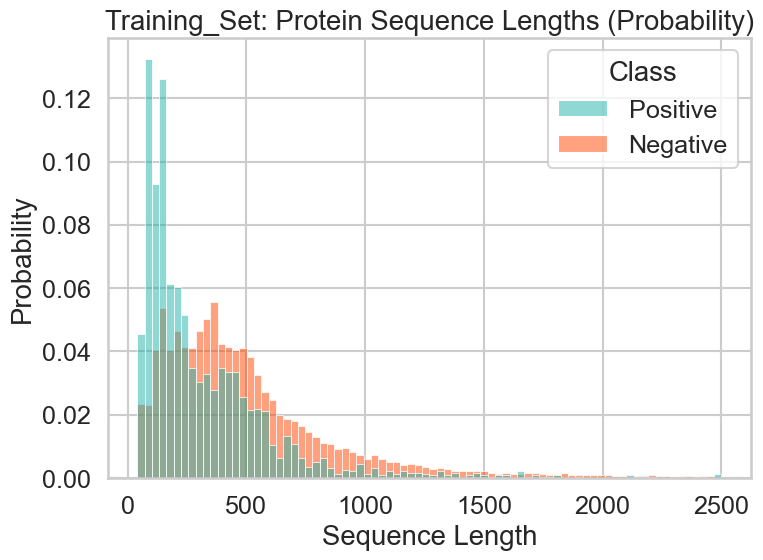

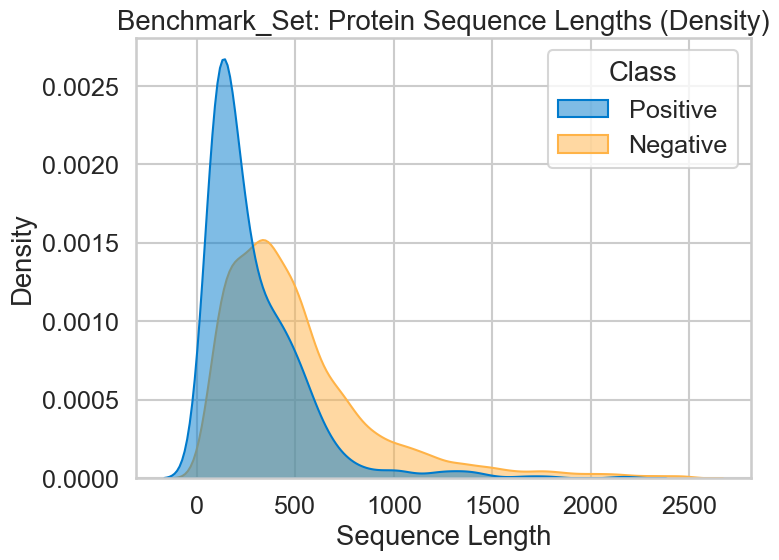

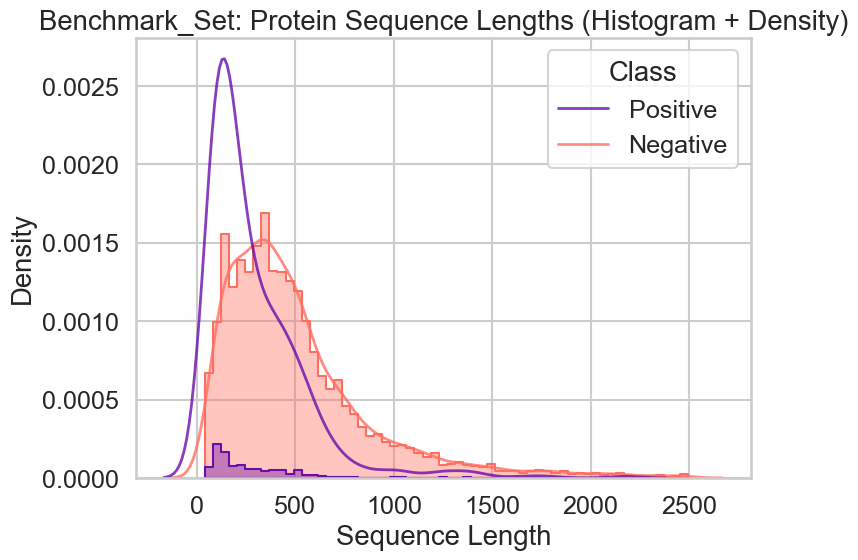

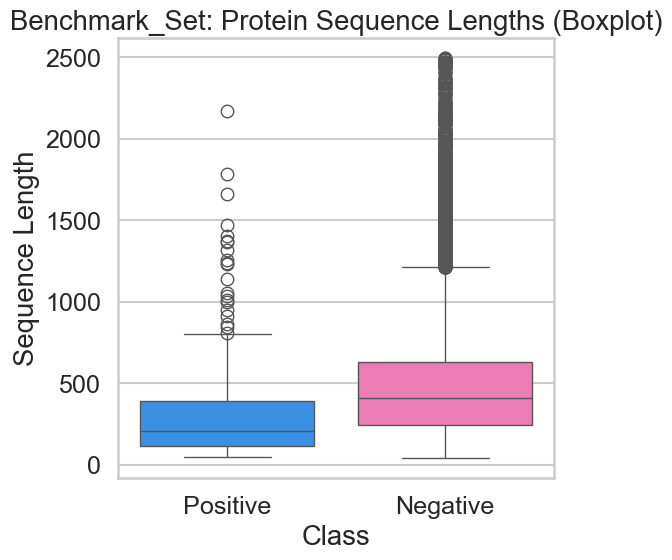

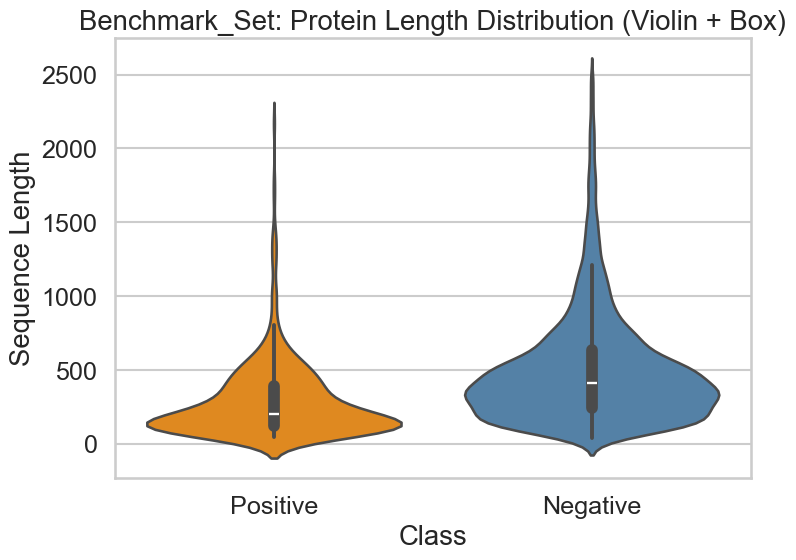

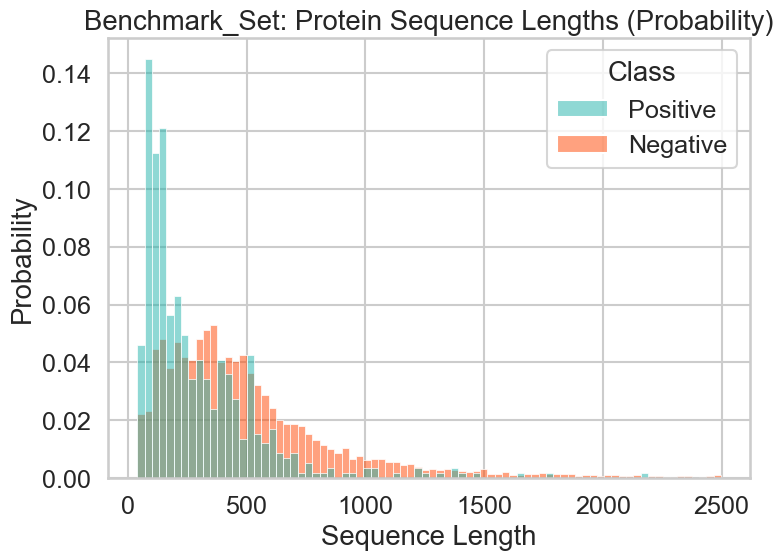

SP-containing entries: 2932


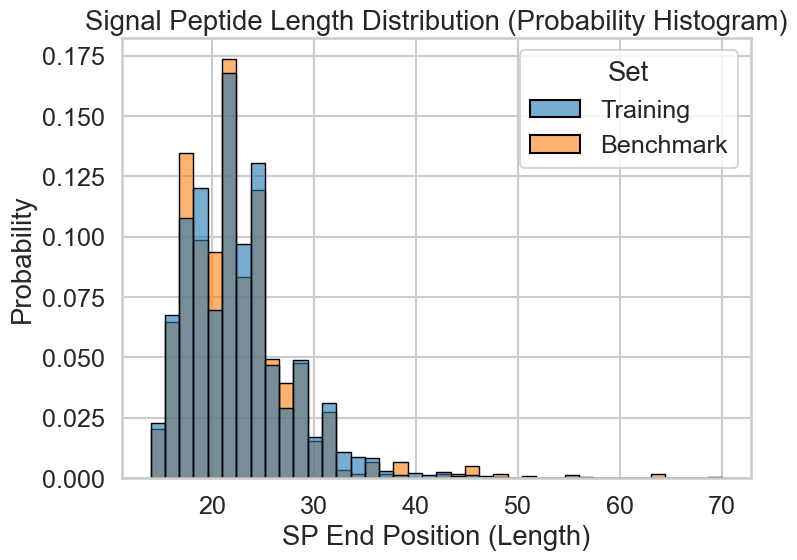

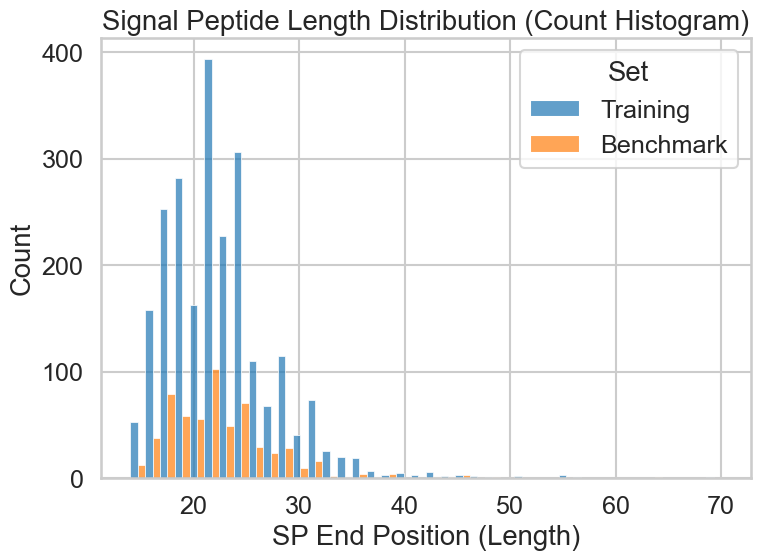

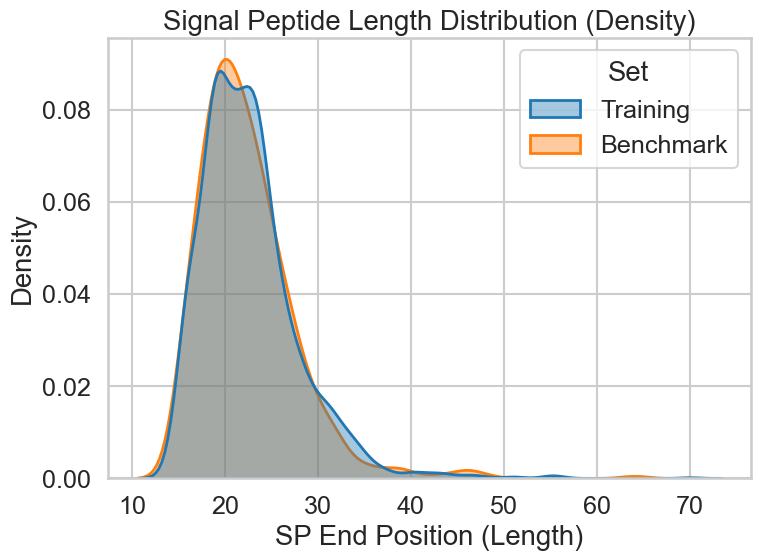

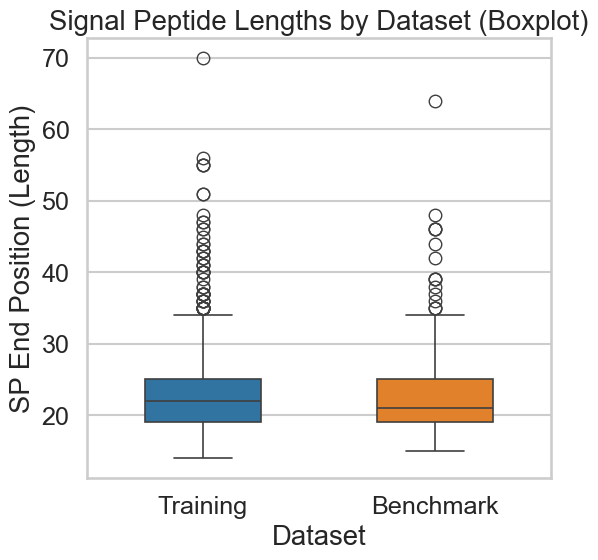

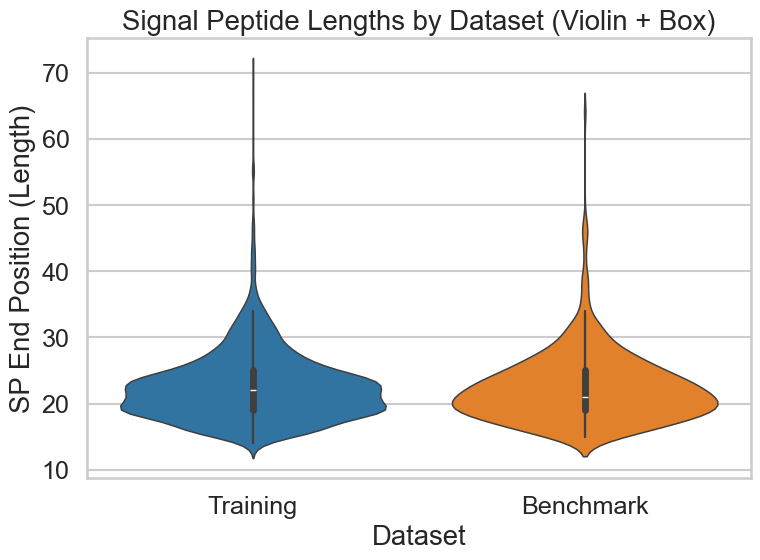

✅ Amino acid frequencies calculated for each SP region.
✅ Mean amino acid frequencies computed:
  AminoAcid        Set  Frequency
0         A  Benchmark   0.141709
1         C  Benchmark   0.029585
2         D  Benchmark   0.005747
3         E  Benchmark   0.011362
4         F  Benchmark   0.052148
✅ Loaded SwissProt reference amino acid frequencies.
✅ Merged SP dataset frequencies with SwissProt reference.
  AminoAcid        Set  Frequency  SwissProt  Relative_to_SwissProt
0         A  Benchmark   0.141709      0.083               1.707336
1         C  Benchmark   0.029585      0.021               1.408819
2         D  Benchmark   0.005747      0.054               0.106434
3         E  Benchmark   0.011362      0.063               0.180353
4         F  Benchmark   0.052148      0.040               1.303689


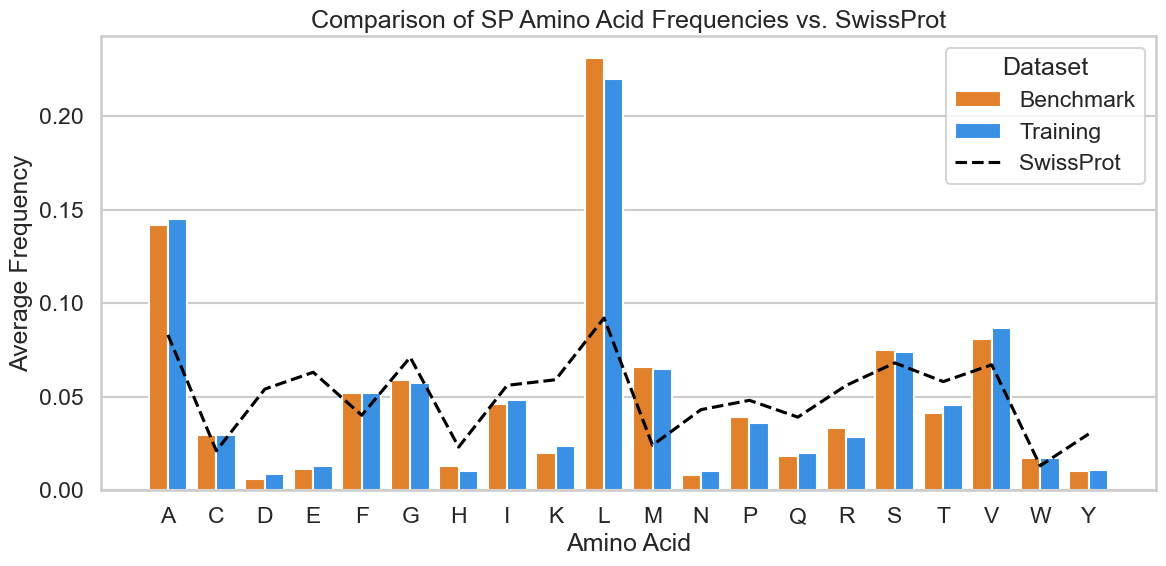

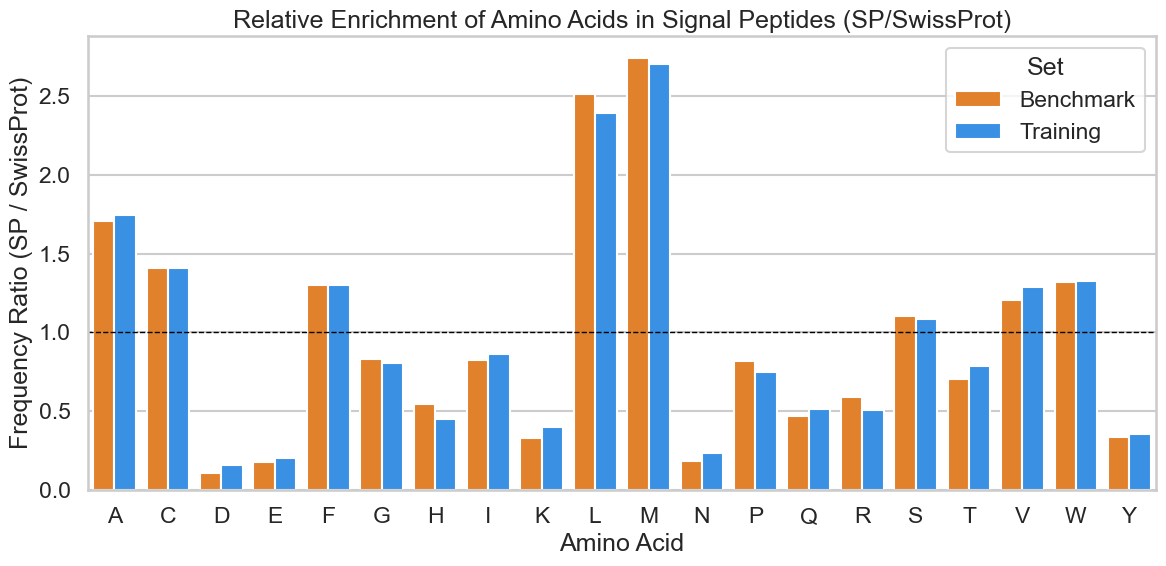

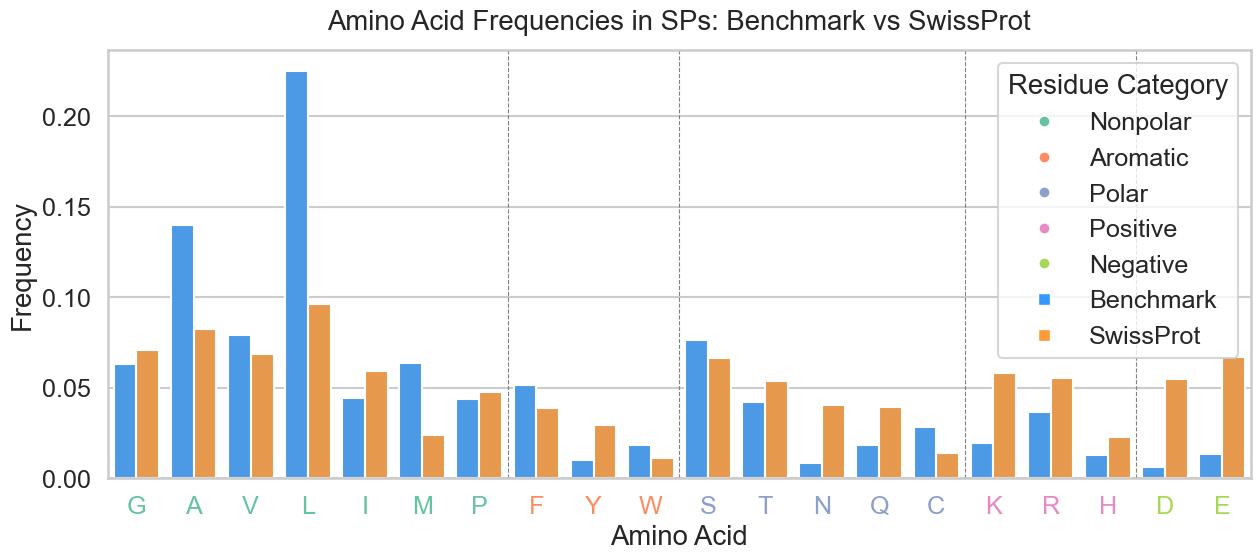

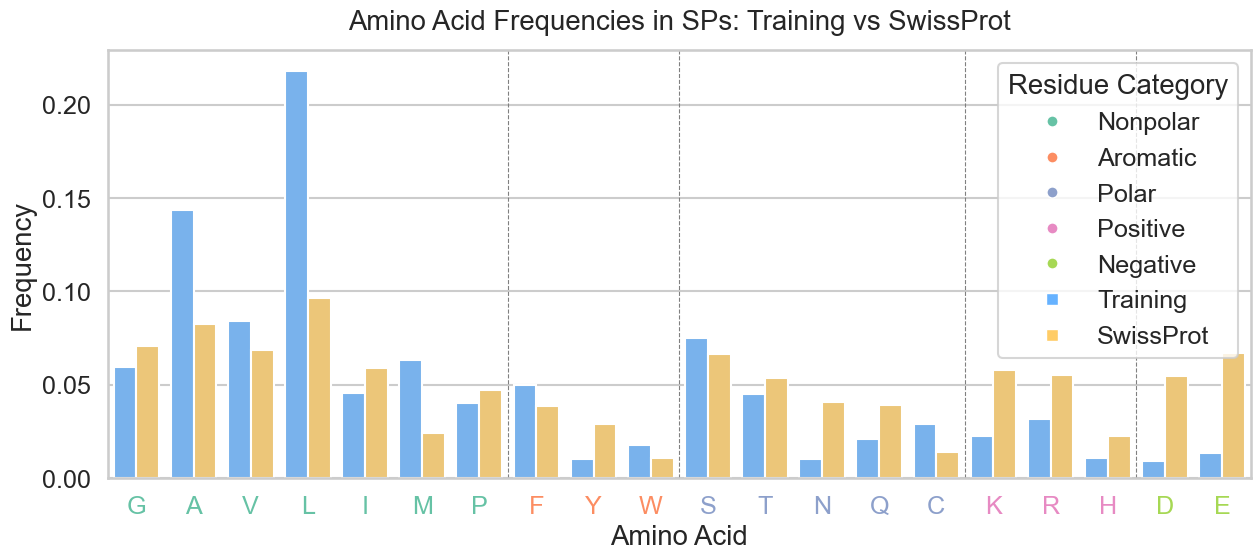

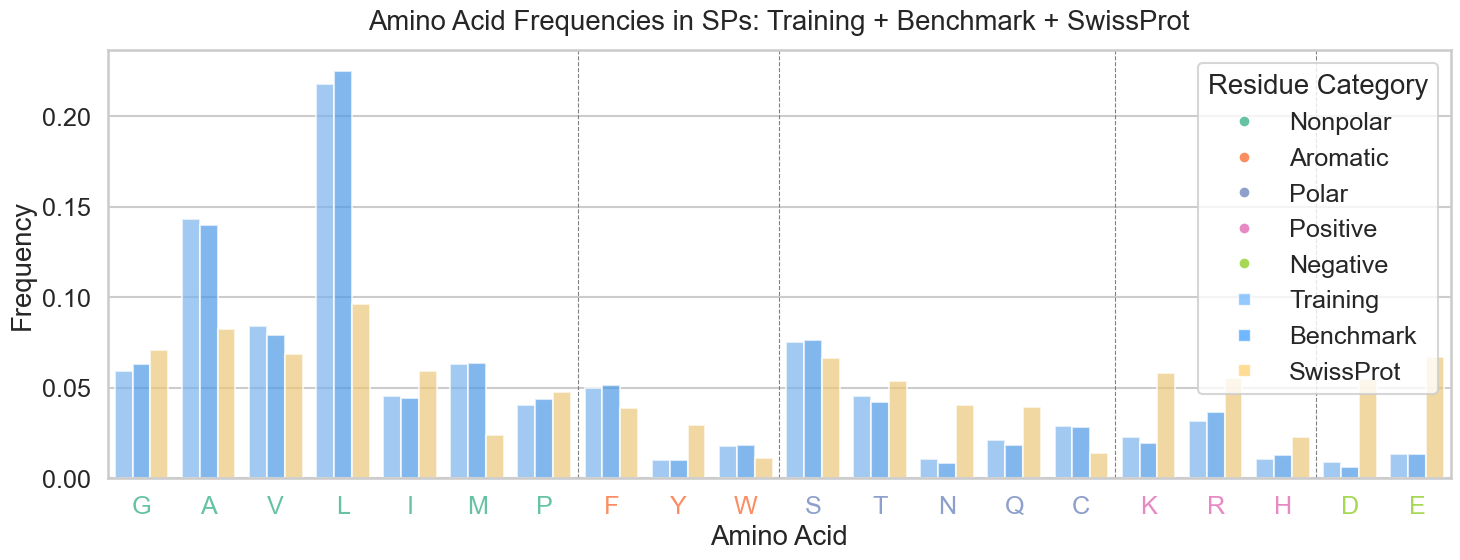

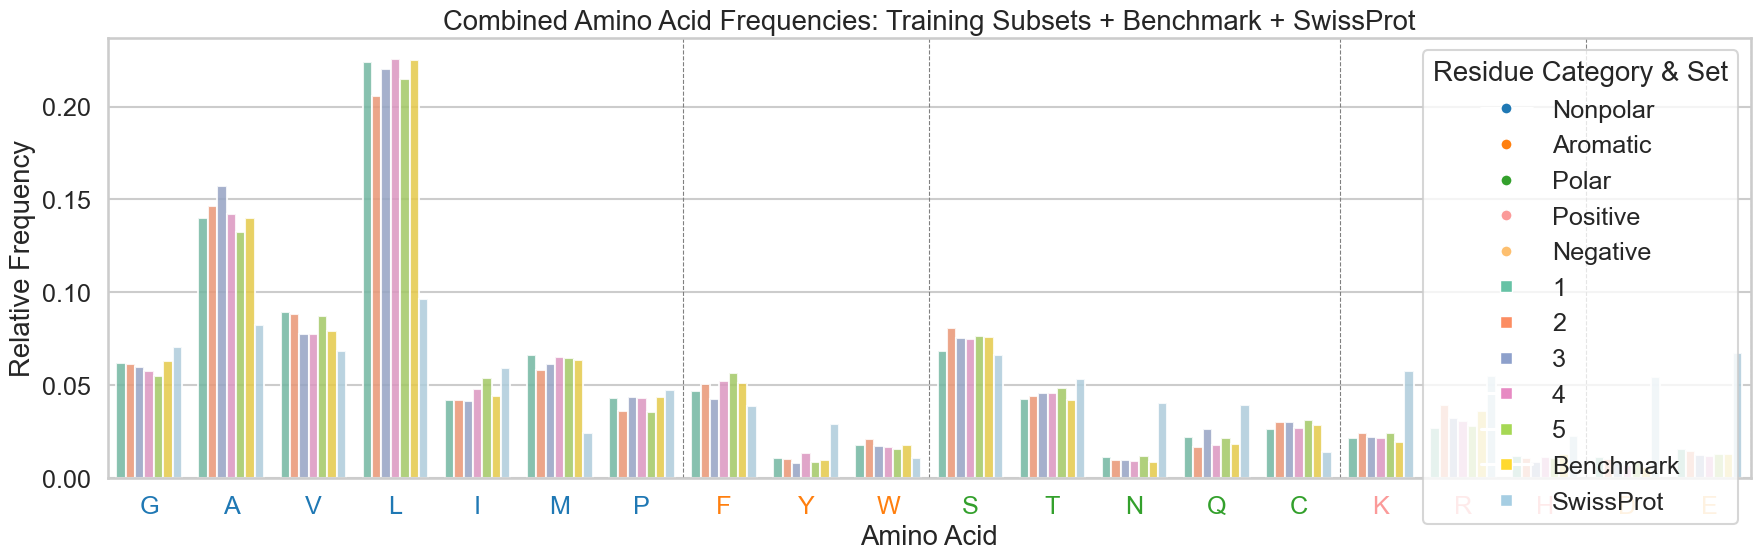

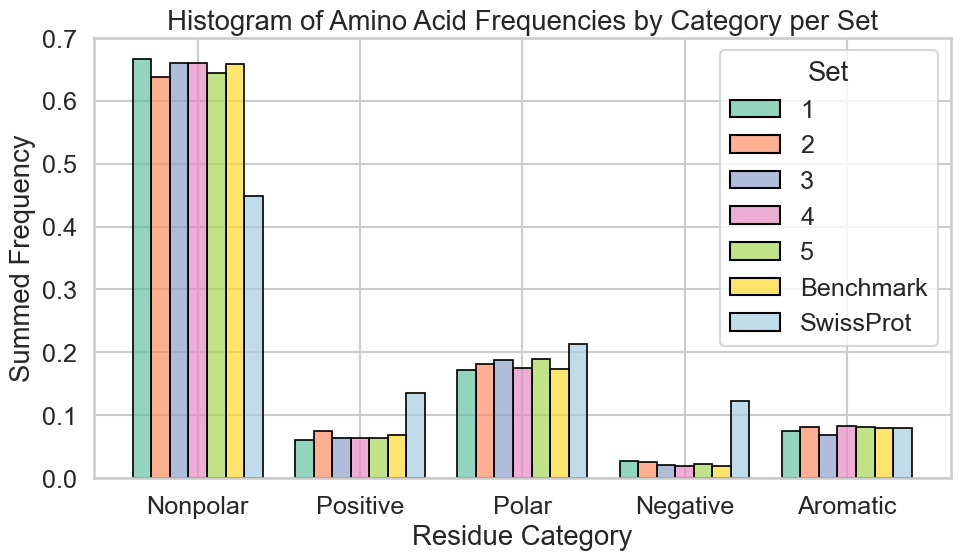

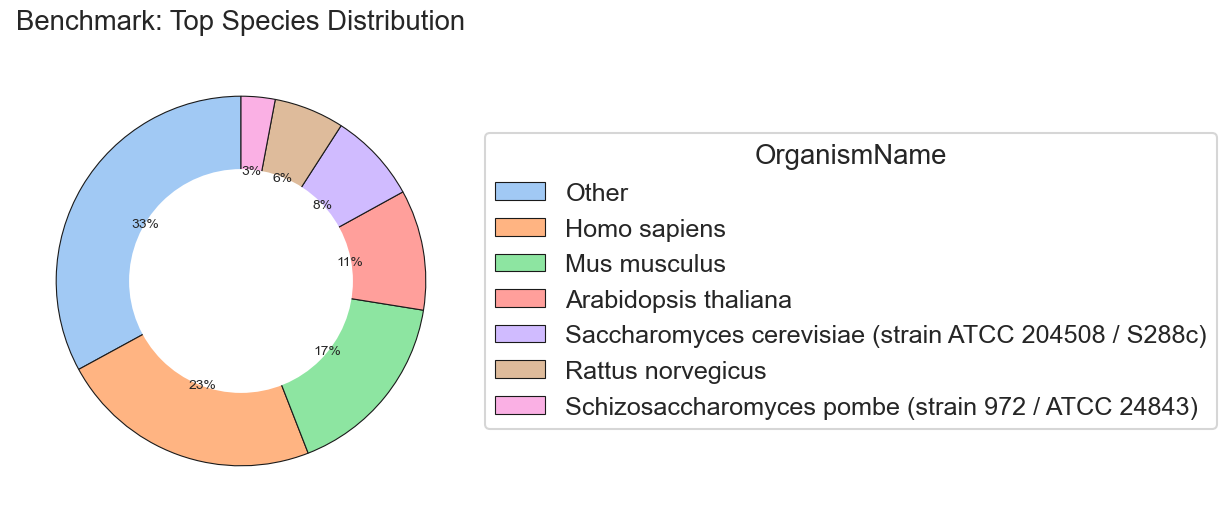

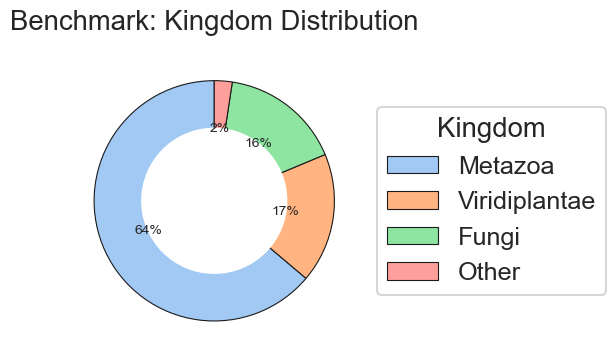

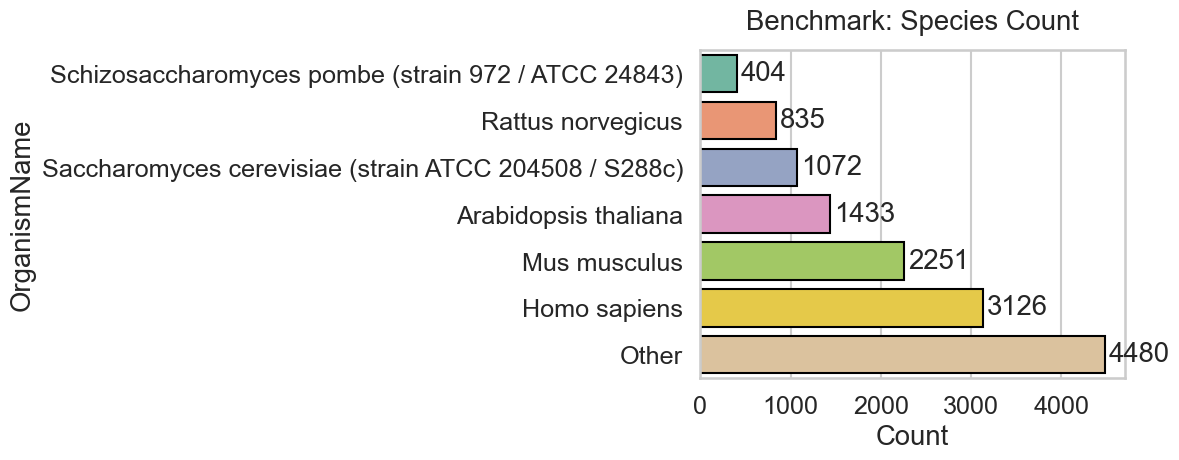

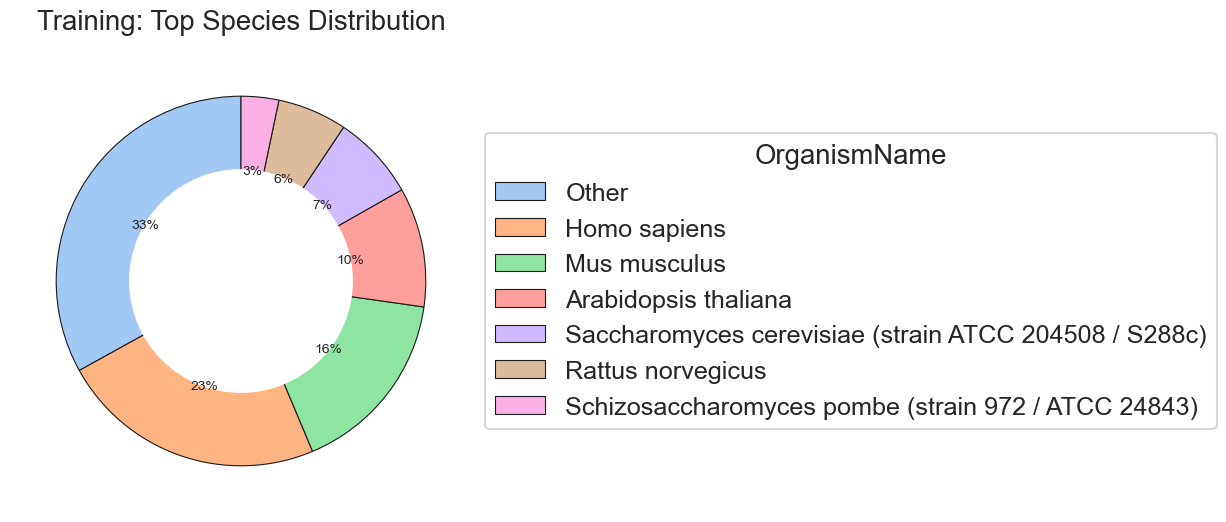

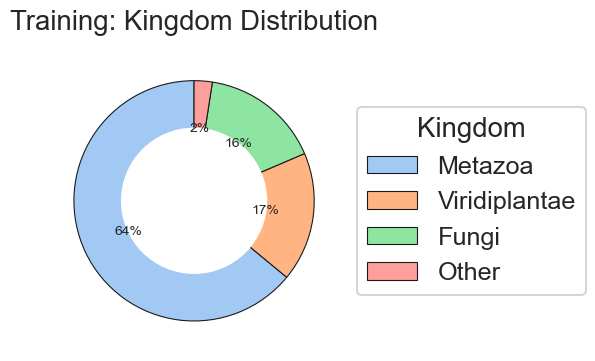

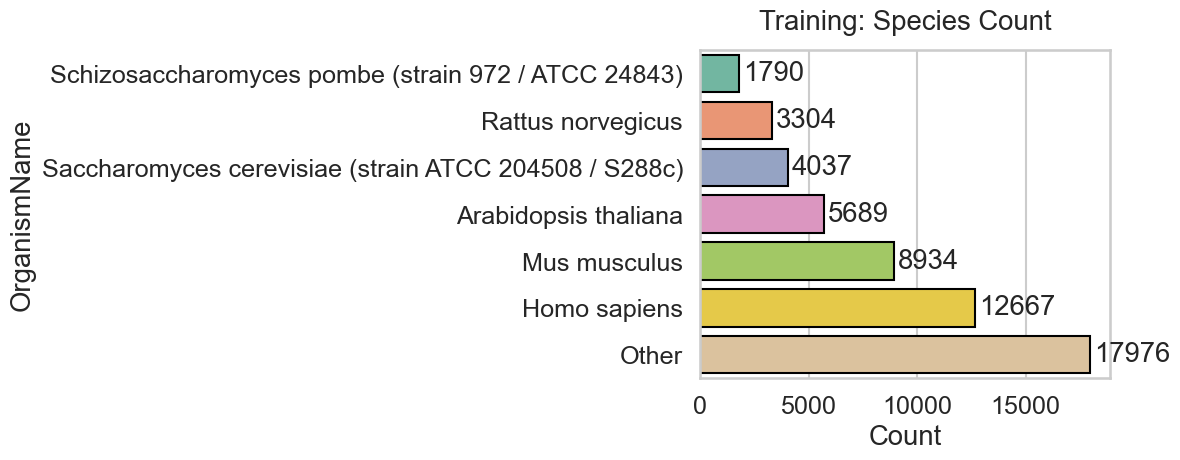

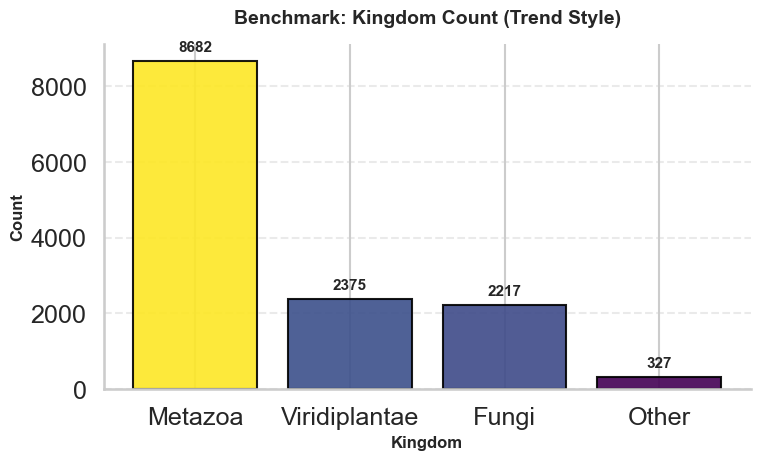

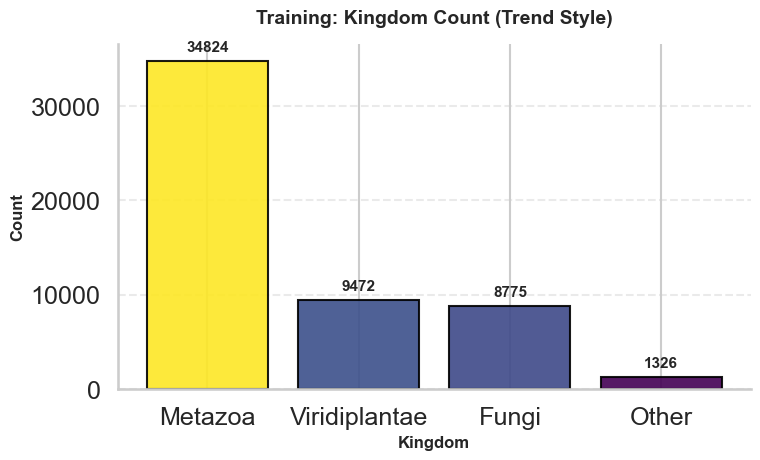

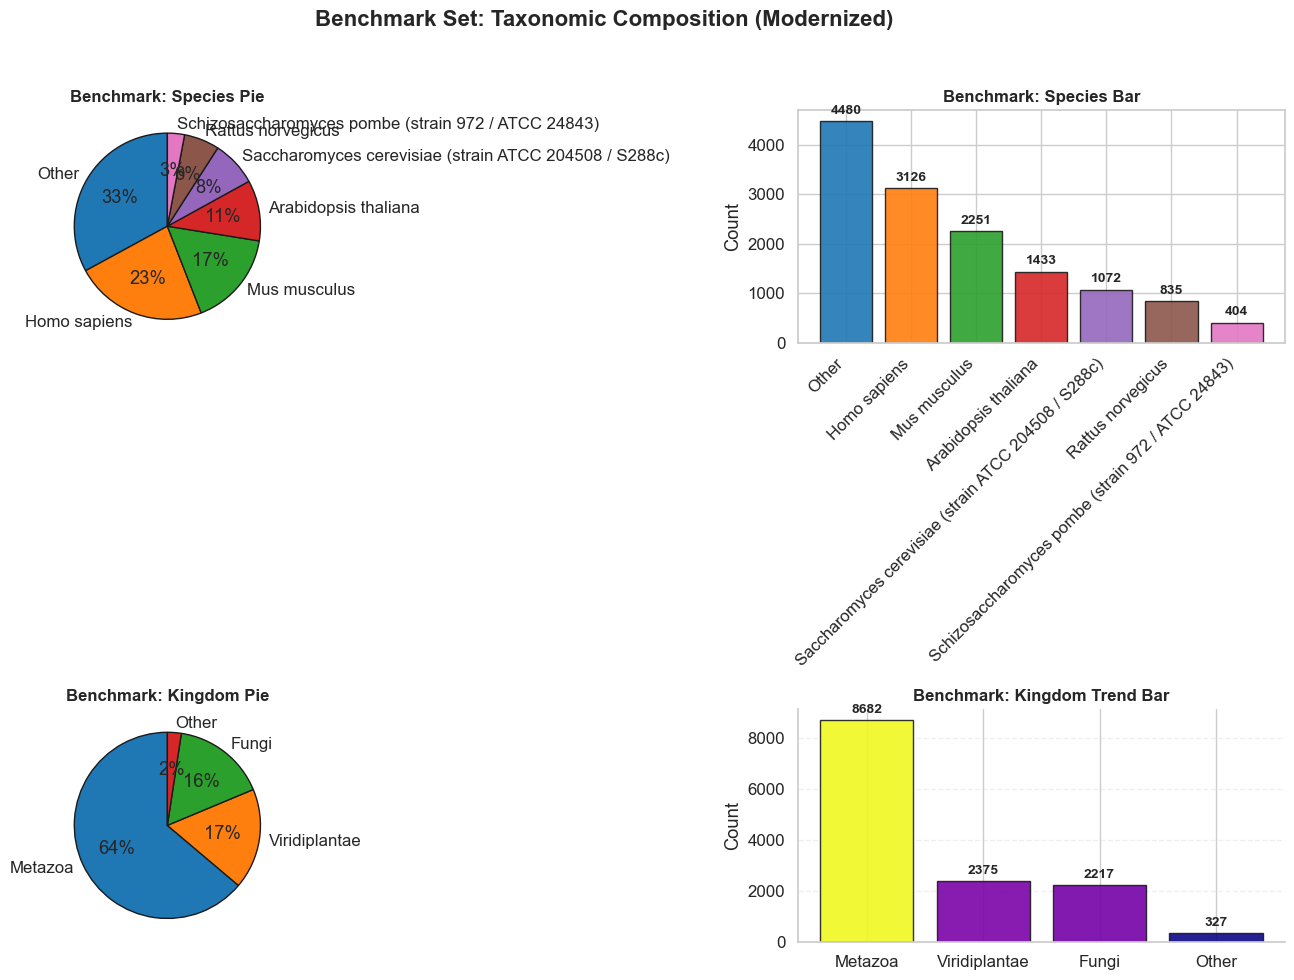

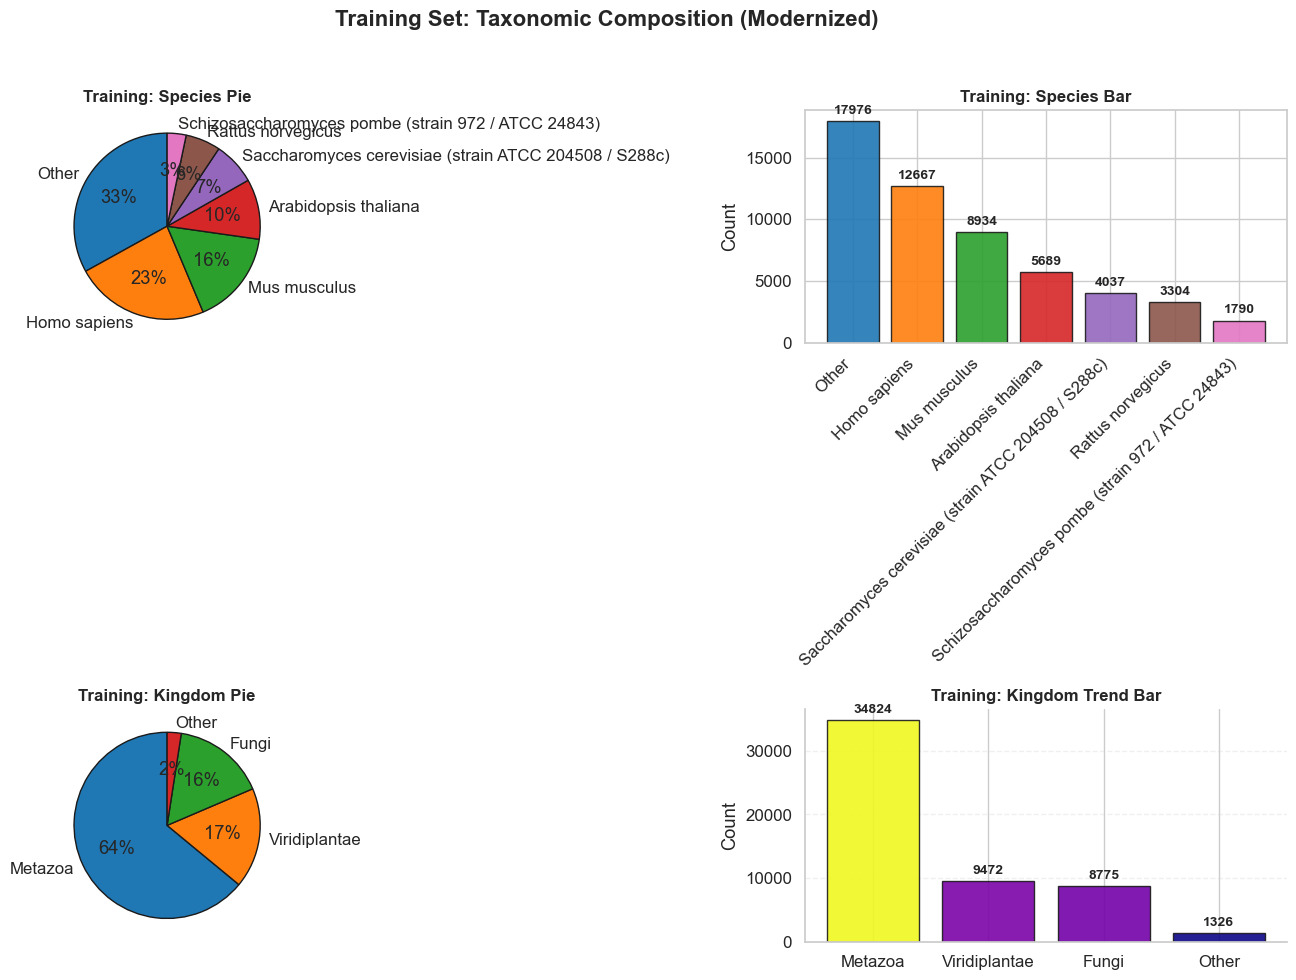

Number of Benchmark SP sequences: 211
Number of Training SP sequences: 882


<Figure size 1200x400 with 0 Axes>

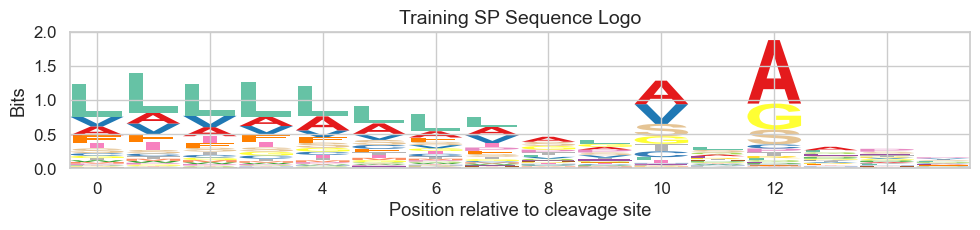

<Figure size 1200x400 with 0 Axes>

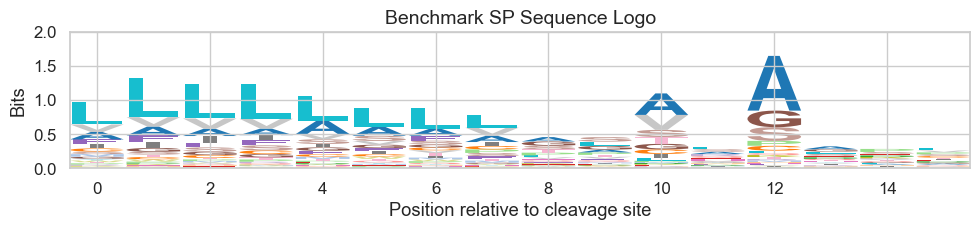

<Figure size 1200x400 with 0 Axes>

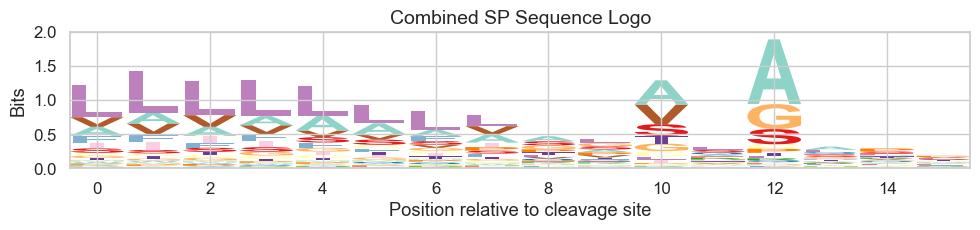

In [3]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
import pandas as pd

# Load merged dataset
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

print("Training entries:", df_train.shape[0])
print("Benchmark entries:", df_bench.shape[0])

# ============================================
# Protein Length Distribution Visualization
# For Training & Benchmark Datasets
# ============================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# Load both datasets
# ------------------------------
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

# ------------------------------
# Filter by realistic protein length (≤2500)
# ------------------------------
df_train_filtered = df_train[df_train["SequenceLength"] <= 2500]
df_bench_filtered = df_bench[df_bench["SequenceLength"] <= 2500]

# ------------------------------
# Global Seaborn style
# ------------------------------
sns.set_theme(context='talk', style='whitegrid', font_scale=1.1)

# Custom palettes (one per plot)
palette_density = ["#007ACC", "#FFB347"]      # Blue-Orange
palette_hist_density = ["#6A0DAD", "#FF6F61"] # Purple-Coral
palette_box = ["#1E90FF", "#FF69B4"]          # Sky Blue - Pink
palette_violin = ["#FF8C00", "#4682B4"]       # Orange - Steel Blue
palette_probability = ["#20B2AA", "#FF4500"]  # Teal - OrangeRed

def plot_length_distributions(df, dataset_name):
    # 1️⃣ Density Plot
    plt.figure(figsize=(8,6))
    sns.kdeplot(
        data=df,
        x="SequenceLength",
        hue="Class",
        common_norm=False,
        fill=True,
        alpha=0.5,
        palette=palette_density
    )
    plt.title(f"{dataset_name}: Protein Sequence Lengths (Density)")
    plt.xlabel("Sequence Length")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_sequence_length_density.png", dpi=300)
    plt.show()

    # 2️⃣ Histogram + Density Combined
    plt.figure(figsize=(8,6))
    sns.histplot(
        data=df,
        x="SequenceLength",
        hue="Class",
        stat="density",
        bins=60,
        element="step",
        alpha=0.4,
        palette=palette_hist_density
    )
    sns.kdeplot(
        data=df,
        x="SequenceLength",
        hue="Class",
        common_norm=False,
        lw=2,
        alpha=0.8,
        palette=palette_hist_density
    )
    plt.title(f"{dataset_name}: Protein Sequence Lengths (Histogram + Density)")
    plt.xlabel("Sequence Length")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_sequence_length_hist_density.png", dpi=300)
    plt.show()

    # 3️⃣ Box Plot
    plt.figure(figsize=(6,6))
    sns.boxplot(
        data=df,
        x="Class",
        y="SequenceLength",
        palette=palette_box
    )
    plt.title(f"{dataset_name}: Protein Sequence Lengths (Boxplot)")
    plt.xlabel("Class")
    plt.ylabel("Sequence Length")
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_sequence_length_boxplot.png", dpi=300)
    plt.show()

    # 4️⃣ Violin Plot
    plt.figure(figsize=(8,6))
    sns.violinplot(
        data=df,
        x="Class",
        y="SequenceLength",
        palette=palette_violin,
        inner="box"
    )
    plt.title(f"{dataset_name}: Protein Length Distribution (Violin + Box)")
    plt.xlabel("Class")
    plt.ylabel("Sequence Length")
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_sequence_length_violin.png", dpi=300)
    plt.show()

    # 5️⃣ Histogram (Probability)
    plt.figure(figsize=(8,6))
    sns.histplot(
        data=df,
        x="SequenceLength",
        hue="Class",
        stat="probability",
        common_norm=False,
        bins=80,
        multiple="layer",
        alpha=0.5,
        palette={"Positive": palette_probability[0], "Negative": palette_probability[1]}
    )
    plt.title(f"{dataset_name}: Protein Sequence Lengths (Probability)")
    plt.xlabel("Sequence Length")
    plt.ylabel("Probability")
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_sequence_length_hist_probability.png", dpi=300)
    plt.show()

# Run for Training Set
plot_length_distributions(df_train_filtered, "Training_Set")

# Run for Benchmark Set
plot_length_distributions(df_bench_filtered, "Benchmark_Set")

# ----------------------------------------------------------
# Signal Peptide (SP) Length Analysis in Training and Benchmark Datasets
# Author: [Your Name]
# Description:
#   This script compares the distribution of Signal Peptide (SP) lengths
#   across the training and benchmark datasets using multiple visualization
#   techniques (Histogram, Density, Boxplot, Violin).
# ----------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================================
# 1️⃣ Load the datasets
# ==========================================================
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

# Add a "Set" label to each dataset for comparison
df_train["Set"] = "Training"
df_bench["Set"] = "Benchmark"

# Combine both datasets
df = pd.concat([df_train, df_bench], ignore_index=True)

# ==========================================================
# 2️⃣ Extract only entries that have an SP (Signal Peptide)
# ==========================================================
df_SP = df[["SPEnd", "SequenceLength", "Class", "Set"]].dropna(subset=["SPEnd"])

print("SP-containing entries:", df_SP.shape[0])

# ==========================================================
# 3️⃣ Set global Seaborn style
# ==========================================================
sns.set_theme(
    context='talk',
    style='whitegrid',
    font='sans-serif',
    font_scale=1.1,
)

# Define a consistent but stylish color palette
palette = {"Training": "#1f77b4", "Benchmark": "#ff7f0e"}

# ==========================================================
# 4️⃣ Histogram (Probability)
# ==========================================================
plt.figure(figsize=(8,6))
sns.histplot(
    data=df_SP,
    x="SPEnd",
    hue="Set",
    stat="probability",
    common_norm=False,
    bins=40,
    alpha=0.6,
    multiple="layer",
    edgecolor="black",
    palette=palette
)
plt.title("Signal Peptide Length Distribution (Probability Histogram)")
plt.xlabel("SP End Position (Length)")
plt.ylabel("Probability")
plt.tight_layout()
plt.savefig("SP_length_histogram_probability.png", dpi=300)
plt.show()

# ==========================================================
# 5️⃣ Histogram (Count)
# ==========================================================
plt.figure(figsize=(8,6))
sns.histplot(
    data=df_SP,
    x="SPEnd",
    hue="Set",
    stat="count",
    bins=40,
    multiple="dodge",
    alpha=0.7,
    palette=palette
)
plt.title("Signal Peptide Length Distribution (Count Histogram)")
plt.xlabel("SP End Position (Length)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("SP_length_histogram_count.png", dpi=300)
plt.show()

# ==========================================================
# 6️⃣ Density Plot (KDE)
# ==========================================================
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df_SP,
    x="SPEnd",
    hue="Set",
    common_norm=False,
    fill=True,
    alpha=0.4,
    lw=2,
    palette=palette
)
plt.title("Signal Peptide Length Distribution (Density)")
plt.xlabel("SP End Position (Length)")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("SP_length_density.png", dpi=300)
plt.show()

# ==========================================================
# 7️⃣ Box Plot
# ==========================================================
plt.figure(figsize=(6,6))
sns.boxplot(
    data=df_SP,
    x="Set",
    y="SPEnd",
    palette=palette,
    width=0.5,
    linewidth=1.2
)
plt.title("Signal Peptide Lengths by Dataset (Boxplot)")
plt.xlabel("Dataset")
plt.ylabel("SP End Position (Length)")
plt.tight_layout()
plt.savefig("SP_length_boxplot.png", dpi=300)
plt.show()

# ==========================================================
# 8️⃣ Violin Plot
# ==========================================================
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df_SP,
    x="Set",
    y="SPEnd",
    palette=palette,
    inner="box",
    linewidth=1.1
)
plt.title("Signal Peptide Lengths by Dataset (Violin + Box)")
plt.xlabel("Dataset")
plt.ylabel("SP End Position (Length)")
plt.tight_layout()
plt.savefig("SP_length_violin.png", dpi=300)
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

# Label datasets for identification
df_train["Set"] = "Training"
df_bench["Set"] = "Benchmark"

# Combine both
df = pd.concat([df_train, df_bench], ignore_index=True)

# Keep only entries with SP annotations
df_sp = df.dropna(subset=["SPStart", "SPEnd", "Sequence"])

# Define amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Calculate frequencies for each SP region
aa_data = []
for _, row in df_sp.iterrows():
    seq = str(row["Sequence"])
    sp_end = int(row["SPEnd"])
    sp_seq = seq[:sp_end]  # Signal peptide region
    length = len(sp_seq)
    freq = {aa: sp_seq.count(aa) / length for aa in amino_acids}
    freq["Set"] = row["Set"]
    aa_data.append(freq)

# Convert to DataFrame
df_freq = pd.DataFrame(aa_data)
print("✅ Amino acid frequencies calculated for each SP region.")

# Calculate mean frequency per amino acid per dataset
df_mean = df_freq.groupby("Set").mean().T
df_mean = df_mean.reset_index().rename(columns={"index": "AminoAcid"})

# Melt for easy plotting
df_melt = df_mean.melt(id_vars="AminoAcid", var_name="Set", value_name="Frequency")

print("✅ Mean amino acid frequencies computed:")
print(df_melt.head())

# Reference amino acid frequencies in SwissProt (approximate values)
swissprot_freq = {
    "A": 0.083, "R": 0.056, "N": 0.043, "D": 0.054, "C": 0.021,
    "Q": 0.039, "E": 0.063, "G": 0.071, "H": 0.023, "I": 0.056,
    "L": 0.092, "K": 0.059, "M": 0.024, "F": 0.040, "P": 0.048,
    "S": 0.068, "T": 0.058, "W": 0.013, "Y": 0.030, "V": 0.067
}

df_ref = pd.DataFrame(list(swissprot_freq.items()), columns=["AminoAcid", "SwissProt"])
print("✅ Loaded SwissProt reference amino acid frequencies.")

# Merge SP frequencies with SwissProt reference
df_compare = pd.merge(df_melt, df_ref, on="AminoAcid", how="left")

# Normalize for better comparison
df_compare["Relative_to_SwissProt"] = df_compare["Frequency"] / df_compare["SwissProt"]

print("✅ Merged SP dataset frequencies with SwissProt reference.")
print(df_compare.head())

sns.set_theme(context="talk", style="whitegrid", font_scale=1)

# Define palette
palette = {"Training": "#1E90FF", "Benchmark": "#FF7F0E"}

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_compare,
    x="AminoAcid",
    y="Frequency",
    hue="Set",
    palette=palette
)
sns.lineplot(
    data=df_ref,
    x="AminoAcid",
    y="SwissProt",
    color="black",
    linestyle="--",
    label="SwissProt"
)
plt.title("Comparison of SP Amino Acid Frequencies vs. SwissProt")
plt.xlabel("Amino Acid")
plt.ylabel("Average Frequency")
plt.legend(title="Dataset", loc="upper right")
plt.tight_layout()
plt.savefig("SP_vs_SwissProt_Frequencies.png", dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_compare,
    x="AminoAcid",
    y="Relative_to_SwissProt",
    hue="Set",
    palette=palette
)
plt.axhline(1, color="black", linestyle="--", linewidth=1)
plt.title("Relative Enrichment of Amino Acids in Signal Peptides (SP/SwissProt)")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency Ratio (SP / SwissProt)")
plt.tight_layout()
plt.savefig("SP_vs_SwissProt_Ratio.png", dpi=300)
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# === Load Datasets ===
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

df_train["Set"] = "Training"
df_bench["Set"] = "Benchmark"
df = pd.concat([df_train, df_bench], ignore_index=True)

# === Keep only signal peptide regions ===
df_sp = df.dropna(subset=["SPStart", "SPEnd", "Sequence"])

# === Amino acid list and category definitions ===
aa_groups = {
    "Nonpolar": list("GAVLIMP"),
    "Aromatic": list("FYW"),
    "Polar": list("STNQC"),
    "Positive": list("KRH"),
    "Negative": list("DE")
}
aa_order = sum(aa_groups.values(), [])

# === SwissProt reference frequencies ===
swiss_freq = {
    "A": 0.0825, "R": 0.0552, "N": 0.0406, "D": 0.0546, "C": 0.0138,
    "Q": 0.0393, "E": 0.0671, "G": 0.0707, "H": 0.0227, "I": 0.0590,
    "L": 0.0964, "K": 0.0579, "M": 0.0241, "F": 0.0386, "P": 0.0474,
    "S": 0.0665, "T": 0.0536, "W": 0.0110, "Y": 0.0292, "V": 0.0685
}

# === Compute SP amino acid frequencies ===
aa_train = dict.fromkeys(aa_order, 0)
aa_bench = dict.fromkeys(aa_order, 0)
total_train = total_bench = 0

for _, row in df_sp.iterrows():
    seq = str(row["Sequence"])
    sp_end = int(row["SPEnd"])
    sp_seq = seq[:sp_end]
    for aa in sp_seq:
        if aa in aa_order:
            if row["Set"] == "Training":
                aa_train[aa] += 1
                total_train += 1
            elif row["Set"] == "Benchmark":
                aa_bench[aa] += 1
                total_bench += 1

# Normalize frequencies
for aa in aa_train:
    aa_train[aa] /= total_train
    aa_bench[aa] /= total_bench

# === Create DataFrames ===
df_train_freq = pd.DataFrame(list(aa_train.items()), columns=["Residue", "Frequency"])
df_train_freq["Database"] = "Training"

df_bench_freq = pd.DataFrame(list(aa_bench.items()), columns=["Residue", "Frequency"])
df_bench_freq["Database"] = "Benchmark"

df_swiss = pd.DataFrame(list(swiss_freq.items()), columns=["Residue", "Frequency"])
df_swiss["Database"] = "SwissProt"

# Merge datasets
train_final = pd.concat([df_train_freq, df_swiss], ignore_index=True)
bench_final = pd.concat([df_bench_freq, df_swiss], ignore_index=True)

sns.set_theme(context="talk", style="whitegrid", font_scale=1.1)

# Category color map (new pastel tone palette)
cat_colors = {
    "Nonpolar": "#66c2a5",
    "Aromatic": "#fc8d62",
    "Polar": "#8da0cb",
    "Positive": "#e78ac3",
    "Negative": "#a6d854"
}

# Residue → Category mapping
res_to_cat = {aa: cat for cat, aas in aa_groups.items() for aa in aas}

# Plot
plt.figure(figsize=(13,6))
ax = sns.barplot(
    data=bench_final,
    x="Residue",
    y="Frequency",
    hue="Database",
    order=aa_order,
    palette=["#3399ff", "#ff9933"]
)

# Color x-axis labels by category
for label in ax.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa)
    if cat:
        label.set_color(cat_colors[cat])

# Add vertical dashed separators between categories
boundaries = []
current_cat = list(aa_groups.keys())[0]
count = 0
for group in aa_groups.values():
    count += len(group)
    boundaries.append(count - 0.5)

for x in boundaries[:-1]:
    plt.axvline(x=x, color="gray", linestyle="--", linewidth=0.8)

# Custom legend handles
category_handles = [Line2D([0],[0],marker='o',color='w',markerfacecolor=c,markersize=8)
                    for c in cat_colors.values()]
legend_labels = list(cat_colors.keys())

dataset_handles = [
    Line2D([0],[0],marker='s',color='w',markerfacecolor='#3399ff',markersize=8),
    Line2D([0],[0],marker='s',color='w',markerfacecolor='#ff9933',markersize=8)
]
dataset_labels = ["Benchmark", "SwissProt"]

plt.legend(category_handles+dataset_handles,
           legend_labels+dataset_labels,
           title="Residue Category",
           loc="upper right",
           frameon=True)

plt.title("Amino Acid Frequencies in SPs: Benchmark vs SwissProt", pad=15)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("SP_AA_Freq_Benchmark_vs_SwissProt_Modern.png", dpi=300)
plt.show()

plt.figure(figsize=(13,6))
ax2 = sns.barplot(
    data=train_final,
    x="Residue",
    y="Frequency",
    hue="Database",
    order=aa_order,
    palette=["#66b2ff", "#ffcc66"]
)

# Color tick labels by residue category
for label in ax2.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa)
    if cat:
        label.set_color(cat_colors[cat])

# Add dashed lines between residue categories
for x in boundaries[:-1]:
    plt.axvline(x=x, color="gray", linestyle="--", linewidth=0.8)

# Custom legend
dataset_handles2 = [
    Line2D([0],[0],marker='s',color='w',markerfacecolor='#66b2ff',markersize=8),
    Line2D([0],[0],marker='s',color='w',markerfacecolor='#ffcc66',markersize=8)
]
dataset_labels2 = ["Training", "SwissProt"]

plt.legend(category_handles+dataset_handles2,
           legend_labels+dataset_labels2,
           title="Residue Category",
           loc="upper right",
           frameon=True)

plt.title("Amino Acid Frequencies in SPs: Training vs SwissProt", pad=15)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("SP_AA_Freq_Training_vs_SwissProt_Modern.png", dpi=300)
plt.show()

# === Step 1: Combine all three datasets ===
combined_df = pd.concat([df_train_freq, df_bench_freq, df_swiss], ignore_index=True)

# === Step 2: Create combined barplot with transparency ===
plt.figure(figsize=(15,6))
ax3 = sns.barplot(
    data=combined_df,
    x="Residue",
    y="Frequency",
    hue="Database",
    order=aa_order,
    palette=["#66b2ff", "#3399ff", "#ffcc66"],  # Training, Benchmark, SwissProt
    alpha=0.7  # makes bars slightly transparent
)

# Color x-axis tick labels by residue category
for label in ax3.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa)
    if cat:
        label.set_color(cat_colors[cat])

# Add dashed lines between residue categories
for x in boundaries[:-1]:
    plt.axvline(x=x, color="gray", linestyle="--", linewidth=0.8)

# Custom legend handles
dataset_handles_combined = [
    Line2D([0],[0],marker='s',color='w',markerfacecolor='#66b2ff',markersize=8, alpha=0.7),
    Line2D([0],[0],marker='s',color='w',markerfacecolor='#3399ff',markersize=8, alpha=0.7),
    Line2D([0],[0],marker='s',color='w',markerfacecolor='#ffcc66',markersize=8, alpha=0.7)
]
dataset_labels_combined = ["Training", "Benchmark", "SwissProt"]

plt.legend(category_handles + dataset_handles_combined,
           legend_labels + dataset_labels_combined,
           title="Residue Category",
           loc="upper right",
           frameon=True)

plt.title("Amino Acid Frequencies in SPs: Training + Benchmark + SwissProt", pad=15)
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("SP_AA_Freq_Combined_Transparent_Modern.png", dpi=300)
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

# === Load Datasets ===
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")
df_train["Set"] = "Training"
df_bench["Set"] = "Benchmark"
df = pd.concat([df_train, df_bench], ignore_index=True)
df_sp = df.dropna(subset=["SPStart", "SPEnd", "Sequence"])

# === Amino acid groups & categories ===
aa_groups = {
    "Nonpolar": list("GAVLIMP"),
    "Aromatic": list("FYW"),
    "Polar": list("STNQC"),
    "Positive": list("KRH"),
    "Negative": list("DE")
}
aa_order = sum(aa_groups.values(), [])
res_to_cat = {aa: cat for cat, aas in aa_groups.items() for aa in aas}
aa_categories = list(aa_groups.keys())

# === Colors ===
set_colors = {
    "1": "#66c2a5", "2": "#fc8d62", "3": "#8da0cb", "4": "#e78ac3", "5": "#a6d854",
    "Benchmark": "#ffd92f", "SwissProt": "#a6cee3"
}
cat_colors = {
    "Nonpolar": "#1f78b4",
    "Aromatic": "#ff7f0e",
    "Polar": "#33a02c",
    "Positive": "#fb9a99",
    "Negative": "#fdbf6f"
}

# === SwissProt reference frequencies ===
swiss_freq = {
    "A": 0.0825, "R": 0.0552, "N": 0.0406, "D": 0.0546, "C": 0.0138,
    "Q": 0.0393, "E": 0.0671, "G": 0.0707, "H": 0.0227, "I": 0.0590,
    "L": 0.0964, "K": 0.0579, "M": 0.0241, "F": 0.0386, "P": 0.0474,
    "S": 0.0665, "T": 0.0536, "W": 0.0110, "Y": 0.0292, "V": 0.0685
}
df_swiss = pd.DataFrame(list(swiss_freq.items()), columns=["Residue","Frequency"])
df_swiss["Set"] = "SwissProt"

# === Training subsets 1-5 ===
df_train_sp = df_sp[df_sp["Set"]=="Training"].copy()
np.random.seed(42)
df_train_sp["Subset"] = np.random.choice(["1","2","3","4","5"], size=len(df_train_sp))

aa_list = list("ARNDCQEGHILKMFPSTWYV")
dfs_per_set = {}

for s in ["1","2","3","4","5"]:
    df_sub = df_train_sp[df_train_sp["Subset"]==s]
    aa_counts = dict.fromkeys(aa_list, 0)
    total_res = 0
    for _, row in df_sub.iterrows():
        sp_seq = str(row["Sequence"])[int(row["SPStart"])-1:int(row["SPEnd"])]
        for aa in sp_seq:
            if aa in aa_counts:
                aa_counts[aa] += 1
                total_res += 1
    data = {"Residue":[], "Frequency":[], "Set":[]}
    for aa in aa_list:
        data["Residue"].append(aa)
        data["Frequency"].append(aa_counts[aa]/total_res if total_res>0 else 0)
        data["Set"].append(s)
    dfs_per_set[s] = pd.DataFrame(data)

# === Benchmark frequencies ===
aa_counts = dict.fromkeys(aa_list, 0)
total_res = 0
df_bench_sp = df_sp[df_sp["Set"]=="Benchmark"]
for _, row in df_bench_sp.iterrows():
    sp_seq = str(row["Sequence"])[int(row["SPStart"])-1:int(row["SPEnd"])]
    for aa in sp_seq:
        if aa in aa_counts:
            aa_counts[aa] += 1
            total_res += 1
data = {"Residue":[], "Frequency":[], "Set":[]}
for aa in aa_list:
    data["Residue"].append(aa)
    data["Frequency"].append(aa_counts[aa]/total_res if total_res>0 else 0)
    data["Set"].append("Benchmark")
dfs_per_set["Benchmark"] = pd.DataFrame(data)

# === Combine all sets with SwissProt ===
all_df = pd.concat(list(dfs_per_set.values()) + [df_swiss], ignore_index=True)
all_df["Residue"] = pd.Categorical(all_df["Residue"], categories=aa_order, ordered=True)
all_df["category"] = all_df["Residue"].map(res_to_cat)

# === Plot: Combined per-residue frequencies ===
sns.set_theme(context="talk", style="whitegrid", font_scale=1.1)
plt.figure(figsize=(18,6))
ax = sns.barplot(
    data=all_df, x="Residue", y="Frequency", hue="Set",
    order=aa_order,
    palette=[set_colors[s] for s in all_df["Set"].unique()],
    alpha=0.85
)

# X-tick labels colored by category
for label in ax.get_xticklabels():
    aa = label.get_text()
    cat = res_to_cat.get(aa)
    if cat:
        label.set_color(cat_colors[cat])

# Dashed separators between categories
count=0
for group in aa_groups.values():
    count += len(group)
    plt.axvline(x=count-0.5,color='gray',linestyle='--',linewidth=0.8)

# Custom legend
category_handles = [Line2D([0],[0],marker='o',color='w',markerfacecolor=c,markersize=8)
                    for c in cat_colors.values()]
dataset_handles = [Line2D([0],[0],marker='s',color='w',markerfacecolor=set_colors[s],markersize=8)
                   for s in all_df["Set"].unique()]
plt.legend(category_handles+dataset_handles,
           list(cat_colors.keys())+list(all_df["Set"].unique()),
           title="Residue Category & Set",
           loc="upper right", frameon=True)

plt.xlabel("Amino Acid")
plt.ylabel("Relative Frequency")
plt.title("Combined Amino Acid Frequencies: Training Subsets + Benchmark + SwissProt")
plt.tight_layout()
plt.savefig("Combined_AA_Frequencies_Modern.png", dpi=300)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'category' column exists
all_df['category'] = all_df['Residue'].map(res_to_cat)
aa_categories = list(aa_groups.keys())  # order of categories

# === Histogram per category ===
plt.figure(figsize=(10,6))
sns.histplot(
    data=all_df,
    x="category",
    weights="Frequency",  # sum of frequencies
    hue="Set",
    multiple="dodge",
    shrink=0.8,
    palette=[set_colors[s] for s in all_df["Set"].unique()],
    edgecolor="black",
    alpha=0.7
)
plt.xlabel("Residue Category")
plt.ylabel("Summed Frequency")
plt.title("Histogram of Amino Acid Frequencies by Category per Set")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("AA_Category_Histogram_Modern.png", dpi=300)
plt.show()



import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load datasets ===
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

df_train["Set"] = "Training"
df_bench["Set"] = "Benchmark"
df = pd.concat([df_train, df_bench], ignore_index=True)

# Reduce OrganismName diversity: keep top 6, merge others into "Other"
top_organisms = df.groupby('OrganismName')['EntryID'].nunique().sort_values(ascending=False).head(6).index.tolist()
df['OrganismName'] = df['OrganismName'].where(df['OrganismName'].isin(top_organisms), 'Other')

bench_set = df[df['Set'] == 'Benchmark']
train_set = df[df['Set'] == 'Training']

# Create output folder
output_folder = "Taxonomy_classification"
os.makedirs(output_folder, exist_ok=True)

# === Color palettes ===
palette_species = sns.color_palette("Set2", n_colors=len(df['OrganismName'].unique()))
palette_kingdom = {"Bacteria":"#66c2a5", "Archaea":"#fc8d62", "Eukaryota":"#8da0cb"}

# === Donut Pie Chart Function ===
def plot_donut(data, column, title, savepath):
    counts = data[column].value_counts()
    colors = sns.color_palette("pastel", n_colors=len(counts))

    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(
        counts,
        labels=None,  # remove direct labels to reduce clutter
        autopct='%.0f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor':'k', 'linewidth':0.8},
        textprops={'fontsize':10}
    )
    # Draw circle for donut
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    plt.gca().add_artist(centre_circle)

    plt.legend(wedges, counts.index, title=column, loc="center left", bbox_to_anchor=(1,0,0.5,1))
    plt.title(title, pad=15)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

# === Horizontal Bar Plot Function ===
def plot_horizontal_bar(data, column, title, palette, savepath):
    counts = data[column].value_counts().sort_values(ascending=True).reset_index()
    counts.columns = [column, "Count"]

    plt.figure(figsize=(12,5))
    colors = [palette.get(v, "gray") if isinstance(palette, dict) else palette[i]
              for i, v in enumerate(counts[column])]
    sns.barplot(
        data=counts,
        y=column,
        x="Count",
        hue=column,
        dodge=False,       
        palette=colors,
        edgecolor="black"
    )

    # Annotate bars with counts
    for index, row in counts.iterrows():
        plt.text(row["Count"] + max(counts["Count"])*0.01, index, str(row["Count"]), va='center')

    plt.xlabel("Count")
    plt.ylabel(column)
    plt.title(title, pad=15)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

# === Generate modernized plots ===
# Benchmark
plot_donut(bench_set, "OrganismName", "Benchmark: Top Species Distribution", f"{output_folder}/species_donut_bench.png")
plot_donut(bench_set, "Kingdom", "Benchmark: Kingdom Distribution", f"{output_folder}/kingdom_donut_bench.png")
plot_horizontal_bar(bench_set, "OrganismName", "Benchmark: Species Count", palette_species, f"{output_folder}/species_bar_bench_modern.png")

# Training
plot_donut(train_set, "OrganismName", "Training: Top Species Distribution", f"{output_folder}/species_donut_train.png")
plot_donut(train_set, "Kingdom", "Training: Kingdom Distribution", f"{output_folder}/kingdom_donut_train.png")
plot_horizontal_bar(train_set, "OrganismName", "Training: Species Count", palette_species, f"{output_folder}/species_bar_train_modern.png")

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sort by count descending for trend
counts = bench_set['Kingdom'].value_counts().sort_values(ascending=False).reset_index()
counts.columns = ['Kingdom', 'Count']

# Gradient color based on count
norm = plt.Normalize(counts['Count'].min(), counts['Count'].max())
colors = plt.cm.viridis(norm(counts['Count']))  # Viridis colormap for modern gradient

plt.figure(figsize=(8,5))
bars = plt.bar(counts['Kingdom'], counts['Count'], color=colors, edgecolor='black', alpha=0.9)

# Annotate counts on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(counts['Count'])*0.02,
             str(int(height)), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Benchmark: Kingdom Count (Trend Style)", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Kingdom", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()  # Remove top and right borders for modern style
plt.tight_layout()
plt.savefig("Taxonomy_classification/kingdom_trend_bench.png", dpi=300)
plt.show()



# Training Kingdom trend plot
counts_train = train_set['Kingdom'].value_counts().sort_values(ascending=False).reset_index()
counts_train.columns = ['Kingdom', 'Count']

# Gradient color based on count
norm_train = plt.Normalize(counts_train['Count'].min(), counts_train['Count'].max())
colors_train = plt.cm.viridis(norm_train(counts_train['Count']))  # same colormap

plt.figure(figsize=(8,5))
bars_train = plt.bar(counts_train['Kingdom'], counts_train['Count'], color=colors_train, edgecolor='black', alpha=0.9)

# Annotate counts on top
for bar in bars_train:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + max(counts_train['Count'])*0.02,
             str(int(height)), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title("Training: Kingdom Count (Trend Style)", fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Kingdom", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.4)
sns.despine()  # modern clean style
plt.tight_layout()
plt.savefig("Taxonomy_classification/kingdom_trend_train.png", dpi=300)
plt.show()



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

df_train["Set"] = "Training"
df_bench["Set"] = "Benchmark"
df = pd.concat([df_train, df_bench], ignore_index=True)

# Top 6 Species
top_species = df['OrganismName'].value_counts().head(6).index.tolist()
df['OrganismName'] = df['OrganismName'].apply(lambda x: x if x in top_species else 'Other')

bench_set = df[df['Set']=="Benchmark"]
train_set = df[df['Set']=="Training"]

species_palette = sns.color_palette("tab10", n_colors=7)
kingdom_palette = {"Bacteria":"#1f77b4", "Archaea":"#ff7f0e", "Eukaryota":"#2ca02c", "Other":"#d62728"}

sns.set_theme(style="whitegrid", font_scale=1.1)

def plot_pie(ax, data, column, title, palette):
    counts = data[column].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.0f%%', startangle=90, colors=palette, wedgeprops=dict(edgecolor='k', linewidth=1))
    ax.set_title(title, fontsize=12, fontweight='bold')

def plot_bar(ax, data, column, title, palette):
    counts = data[column].value_counts().sort_values(ascending=False)
    bars = ax.bar(counts.index, counts.values, color=palette, edgecolor='k', alpha=0.9)
    ax.set_title(title, fontsize=12, fontweight='bold')
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + counts.max()*0.02, str(int(height)), ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.set_ylabel("Count")
    ax.set_xticklabels(counts.index, rotation=45, ha='right')

def plot_trend_bar(ax, data, title):
    counts = data['Kingdom'].value_counts().sort_values(ascending=False)
    norm = plt.Normalize(counts.min(), counts.max())
    colors = plt.cm.plasma(norm(counts))
    bars = ax.bar(counts.index, counts.values, color=colors, edgecolor='k', alpha=0.9)
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + counts.max()*0.02, str(int(height)), ha='center', va='bottom', fontsize=10, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel("Count")
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    sns.despine(ax=ax)

# -------------------
# Benchmark Figure
# -------------------
fig, axes = plt.subplots(2,2, figsize=(14,10))
plot_pie(axes[0,0], bench_set, 'OrganismName', "Benchmark: Species Pie", species_palette)
plot_bar(axes[0,1], bench_set, 'OrganismName', "Benchmark: Species Bar", species_palette)
plot_pie(axes[1,0], bench_set, 'Kingdom', "Benchmark: Kingdom Pie", list(kingdom_palette.values()))
plot_trend_bar(axes[1,1], bench_set, "Benchmark: Kingdom Trend Bar")
plt.suptitle("Benchmark Set: Taxonomic Composition (Modernized)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.96])
plt.savefig("Taxonomy_classification/benchmark_taxonomy_modern.png", dpi=300)
plt.show()

# -------------------
# Training Figure
# -------------------
fig, axes = plt.subplots(2,2, figsize=(14,10))
plot_pie(axes[0,0], train_set, 'OrganismName', "Training: Species Pie", species_palette)
plot_bar(axes[0,1], train_set, 'OrganismName', "Training: Species Bar", species_palette)
plot_pie(axes[1,0], train_set, 'Kingdom', "Training: Kingdom Pie", list(kingdom_palette.values()))
plot_trend_bar(axes[1,1], train_set, "Training: Kingdom Trend Bar")
plt.suptitle("Training Set: Taxonomic Composition (Modernized)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0,0,1,0.96])
plt.savefig("Taxonomy_classification/training_taxonomy_modern.png", dpi=300)
plt.show()

! pip install logomaker

import pandas as pd
import matplotlib.pyplot as plt
import logomaker as lm
import os

# === Load datasets ===
df_train = pd.read_csv("training_set_with_sequences.tsv", sep="\t")
df_bench = pd.read_csv("benchmark_set_with_sequences.tsv", sep="\t")

# Label datasets
df_train["Set"] = "Training"
df_bench["Set"] = "Benchmark"

df = pd.concat([df_train, df_bench], ignore_index=True)
df_sp = df.dropna(subset=["Sequence", "SPStart", "SPEnd"])

# Make output folder if doesn't exist
output_dir = "SequenceLogo"
os.makedirs(output_dir, exist_ok=True)

# Safe extraction of SP window
def extract_sp_window(seq, cleavage, before=12, after=3):
    if pd.isnull(seq) or pd.isnull(cleavage):
        return None
    start = max(0, int(cleavage)-before-1)
    end = int(cleavage)+after
    if end > len(seq):
        return None
    return seq[start:end]

# Extract sequences
bench_pos = df_sp.query('Class=="Positive" and Set=="Benchmark"')
train_pos = df_sp.query('Class=="Positive" and Set=="Training"')

bench_seqs = [extract_sp_window(row["Sequence"], row["SPEnd"])
              for _, row in bench_pos.iterrows() if extract_sp_window(row["Sequence"], row["SPEnd"]) is not None]

train_seqs = [extract_sp_window(row["Sequence"], row["SPEnd"])
              for _, row in train_pos.iterrows() if extract_sp_window(row["Sequence"], row["SPEnd"]) is not None]

print("Number of Benchmark SP sequences:", len(bench_seqs))
print("Number of Training SP sequences:", len(train_seqs))

# Function to generate sequence logo with custom colors
def plot_sequence_logo(sequences, savepath, color_scheme, figsize=(12,4), title="Sequence Logo"):
    if len(sequences) == 0:
        print(f"⚠️ No sequences to plot for {title}")
        return

    counts_df = lm.alignment_to_matrix(sequences=sequences, to_type='information', characters_to_ignore='.-X')

    plt.figure(figsize=figsize)
    lm.Logo(counts_df, color_scheme=color_scheme, shade_below=.5, fade_below=.5)

    plt.title(title, fontsize=14)
    plt.xlabel("Position relative to cleavage site")
    plt.ylabel("Bits")
    plt.ylim(0, 2.0)
    plt.tight_layout()
    plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

# === Define unique color schemes for each logo ===
bench_colors = {
    'A':'#1f77b4','C':'#ff7f0e','D':'#2ca02c','E':'#d62728','F':'#9467bd',
    'G':'#8c564b','H':'#e377c2','I':'#7f7f7f','K':'#bcbd22','L':'#17becf',
    'M':'#aec7e8','N':'#ffbb78','P':'#98df8a','Q':'#ff9896','R':'#c5b0d5',
    'S':'#c49c94','T':'#f7b6d2','V':'#c7c7c7','W':'#dbdb8d','Y':'#9edae5'
}

train_colors = {
    'A':'#e41a1c','C':'#377eb8','D':'#4daf4a','E':'#984ea3','F':'#ff7f00',
    'G':'#ffff33','H':'#a65628','I':'#f781bf','K':'#999999','L':'#66c2a5',
    'M':'#fc8d62','N':'#8da0cb','P':'#e78ac3','Q':'#a6d854','R':'#ffd92f',
    'S':'#e5c494','T':'#b3b3b3','V':'#1f78b4','W':'#33a02c','Y':'#fb9a99'
}

combined_colors = {
    'A':'#8dd3c7','C':'#ffffb3','D':'#bebada','E':'#fb8072','F':'#80b1d3',
    'G':'#fdb462','H':'#b3de69','I':'#fccde5','K':'#d9d9d9','L':'#bc80bd',
    'M':'#ccebc5','N':'#ffed6f','P':'#ff7f00','Q':'#1f78b4','R':'#33a02c',
    'S':'#e31a1c','T':'#6a3d9a','V':'#b15928','W':'#a6cee3','Y':'#b2df8a'
}

# === Generate logos ===
plot_sequence_logo(train_seqs, f"{output_dir}/sequence_logo_training_modern_colors.png",
                   color_scheme=train_colors, title="Training SP Sequence Logo")

plot_sequence_logo(bench_seqs, f"{output_dir}/sequence_logo_benchmark_modern_colors.png",
                   color_scheme=bench_colors, title="Benchmark SP Sequence Logo")

plot_sequence_logo(bench_seqs + train_seqs, f"{output_dir}/sequence_logo_combined_modern_colors.png",
                   color_scheme=combined_colors, title="Combined SP Sequence Logo")